In [1]:
%matplotlib inline


# Image Demo


Many ways to plot images in Matplotlib.

The most common way to plot images in Matplotlib is with
:meth:`~.axes.Axes.imshow`. The following examples demonstrate much of the
functionality of imshow and the many images you can create.


In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

First we'll generate a simple bivariate normal distribution.



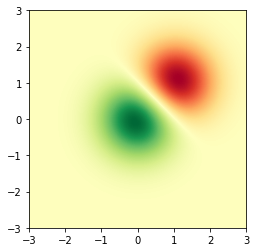

In [3]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

It is also possible to show images of pictures.



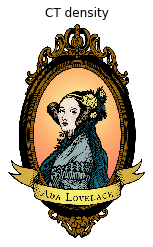

In [11]:
# A sample image
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis


# And another image

# w, h = 512, 512

# with cbook.get_sample_data('ct.raw.gz') as datafile:
#     s = datafile.read()
# A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
# A /= A.max()

# fig, ax = plt.subplots()
# extent = (0, 25, 0, 25)
# im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

# # markers = [(15.9, 14.5), (16.8, 15)]
# # x, y = zip(*markers)
# # ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

Interpolating images
--------------------

It is also possible to interpolate images before displaying them. Be careful,
as this may manipulate the way your data looks, but it can be helpful for
achieving the look you want. Below we'll display the same (small) array,
interpolated with three different interpolation methods.

The center of the pixel at A[i,j] is plotted at i+0.5, i+0.5.  If you
are using interpolation='nearest', the region bounded by (i,j) and
(i+1,j+1) will have the same color.  If you are using interpolation,
the pixel center will have the same color as it does with nearest, but
other pixels will be interpolated between the neighboring pixels.

To prevent edge effects when doing interpolation, Matplotlib pads the input
array with identical pixels around the edge: if you have a 5x5 array with
colors a-y as below::

  a b c d e
  f g h i j
  k l m n o
  p q r s t
  u v w x y

Matplotlib computes the interpolation and resizing on the padded array ::

  a a b c d e e
  a a b c d e e
  f f g h i j j
  k k l m n o o
  p p q r s t t
  o u v w x y y
  o u v w x y y

and then extracts the central region of the result.  (Extremely old versions
of Matplotlib (<0.63) did not pad the array, but instead adjusted the view
limits to hide the affected edge areas.)

This approach allows plotting the full extent of an array without
edge effects, and for example to layer multiple images of different
sizes over one another with different interpolation methods -- see
:doc:`/gallery/images_contours_and_fields/layer_images`.  It also implies
a performance hit, as this new temporary, padded array must be created.
Sophisticated interpolation also implies a performance hit; for maximal
performance or very large images, interpolation='nearest' is suggested.



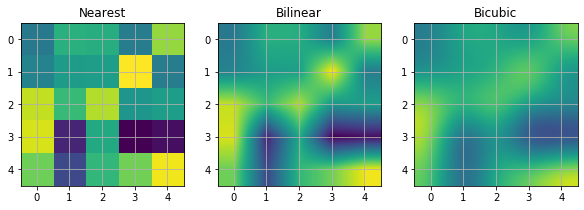

In [5]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

You can specify whether images should be plotted with the array origin
x[0,0] in the upper left or lower right by using the origin parameter.
You can also control the default setting image.origin in your
`matplotlibrc file <customizing-with-matplotlibrc-files>`. For more on
this topic see the :doc:`complete guide on origin and extent
</tutorials/intermediate/imshow_extent>`.



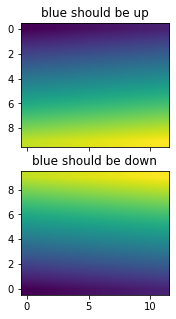

In [6]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

Finally, we'll show an image using a clip path.



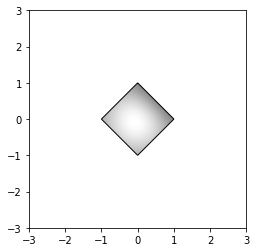

In [7]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='none')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray,
               origin='lower', extent=[-3, 3, -3, 3],
               clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

------------

References
""""""""""

The use of the following functions and methods is shown
in this example:



In [ ]:
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.artist.Artist.set_clip_path
matplotlib.patches.PathPatch